# DataFrame

Credits: data taken from UCI

* Most famous way of interacting with Spark is through DataFrame
* Faster than RDD as it has an optimization layer that converts the user request to optimized plan for execution 
* Using RDDs require knowledge of atleast one functional language
* DataFrame API executes at a language neutral level so has similar execution times in both python and scala
* Also comes with JDBC and ODBC connections which enable BI tool connections

In [1]:
from pyspark.sql import Row
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pylab as P
from pyspark.sql.types import *

In [2]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *

spark = SparkSession.builder.master("local").appName("Word Count").getOrCreate()

In [3]:
static = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/home/jovyan/dayOne.csv")

In [4]:
static.createOrReplaceTempView("retail_Data")

In [5]:
static.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



In [6]:
spark.sql("""SELECT * FROM retail_Data ORDER BY UnitPrice DESC """).show(5)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536592|      DOT|      DOTCOM POSTAGE|       1|2010-12-01 17:06:00|   607.49|      null|United Kingdom|
|   536544|      DOT|      DOTCOM POSTAGE|       1|2010-12-01 14:32:00|   569.77|      null|United Kingdom|
|   536392|    22827|RUSTIC  SEVENTEEN...|       1|2010-12-01 10:29:00|    165.0|   13705.0|United Kingdom|
|   536592|    22503|CABIN BAG VINTAGE...|       1|2010-12-01 17:06:00|    59.53|      null|United Kingdom|
|   536544|    22769|CHALKBOARD KITCHE...|       1|2010-12-01 14:32:00|    51.02|      null|United Kingdom|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
only showing top 5 rows



In [7]:
from pyspark.sql.functions import window, column, desc, col
static.selectExpr("CustomerID","(UnitPrice * Quantity) as total_cost","InvoiceDate").groupBy(col("CustomerID")).sum("total_cost").show(5)

+----------+---------------+
|CustomerID|sum(total_cost)|
+----------+---------------+
|   15311.0|         445.33|
|   16539.0|         442.35|
|   15100.0|          350.4|
|   12583.0|         855.86|
|   15291.0|          328.8|
+----------+---------------+
only showing top 5 rows



In [8]:
foo = spark.sql("""SELECT * FROM retail_Data ORDER BY UnitPrice DESC """)

In [9]:
test = foo.where("Country = 'United Kingdom'")

In [10]:
train = foo.where("Country != 'United Kingdom'")

In [11]:
test.count()

2949

In [12]:
train.count()

159

In [13]:
spark.sql("""SELECT * FROM retail_Data ORDER BY UnitPrice DESC """).explain()

== Physical Plan ==
*(2) Sort [UnitPrice#15 DESC NULLS LAST], true, 0
+- Exchange rangepartitioning(UnitPrice#15 DESC NULLS LAST, 200)
   +- *(1) FileScan csv [InvoiceNo#10,StockCode#11,Description#12,Quantity#13,InvoiceDate#14,UnitPrice#15,CustomerID#16,Country#17] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/home/jovyan/dayOne.csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<InvoiceNo:string,StockCode:string,Description:string,Quantity:int,InvoiceDate:timestamp,Un...


In [15]:
UP = spark.sql("""SELECT UnitPrice FROM retail_Data""")

In [16]:
UPList = UP.rdd.map(lambda p: p.UnitPrice).collect()

In [17]:
UP.describe().show()

+-------+------------------+
|summary|         UnitPrice|
+-------+------------------+
|  count|              3108|
|   mean| 4.151946589446603|
| stddev|15.638659854603892|
|    min|               0.0|
|    max|            607.49|
+-------+------------------+



(array([3.105e+03, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  0.   ,  60.749, 121.498, 182.247, 242.996, 303.745, 364.494,
        425.243, 485.992, 546.741, 607.49 ]),
 <a list of 10 Patch objects>)

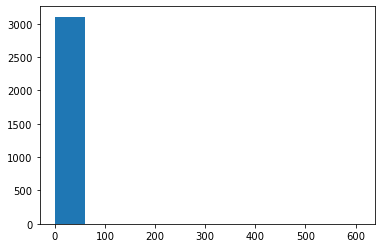

In [18]:
plt.hist(UPList)

In [20]:
UK = spark.sql("""SELECT * FROM retail_Data WHERE Country = 'United Kingdom' """)

In [21]:
UK.repartition(1).write.csv("UK.csv", sep=',', header=True)

* like CSV you can also import JSON

In [22]:
UK.rdd.count()

2949

In [24]:
UK.rdd.take(1)

[Row(InvoiceNo='536365', StockCode='85123A', Description='WHITE HANGING HEART T-LIGHT HOLDER', Quantity=6, InvoiceDate=datetime.datetime(2010, 12, 1, 8, 26), UnitPrice=2.55, CustomerID=17850.0, Country='United Kingdom')]